In [41]:
# Keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [42]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [43]:
train_images.shape

(60000, 28, 28)

In [44]:
train_images[0,23,23]

194

In [45]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [46]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

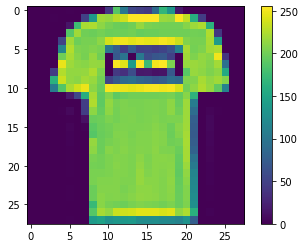

In [47]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [48]:
# Data preprocessing
train_images = train_images / 255.0

test_images = test_images / 255.0

In [49]:
# Creating the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [50]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# Training
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2022-04-13 11:25:04.238490: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4958 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3719 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3107 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2802 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2567 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2482 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2385 - accurac

In [52]:
# Evaluation
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8847
Test accuracy: 0.8847000002861023


In [53]:
# Predictions
predictions = model.predict(test_images)

In [54]:
predictions[0]

array([1.9643845e-07, 4.7157700e-09, 6.6466210e-10, 4.1454259e-10,
       6.7409225e-09, 1.3935155e-03, 2.8625092e-08, 5.1171761e-03,
       1.8389912e-07, 9.9348879e-01], dtype=float32)

In [55]:
np.argmax(predictions[0])

9

In [56]:
test_labels[0]

9

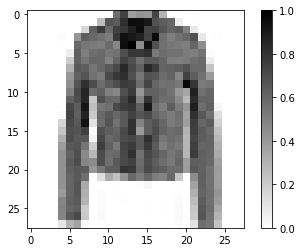

Actual: Coat
Prediction: Coat


In [57]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print("Actual: " + label)
  print("Prediction: " + guess)


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)